# LAB 7
# PDE

## Question 7

### Solve by Crank-Nicholson Scheme.
Parabolic PDE, $B^2-AC = 0$. Heat Equation.

$$u_t = u_{xx}$$

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$Initial Condition: 
$$u(x,0) = \sin{(\pi x)}$$

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad$Boundary Condition:
$$u(0,t) = 0$$
$$u(1,t) = 0$$

$$\delta t = \frac{1}{96}, \;\;\; \text{Experiment with different}\; \delta x.$$

In [1]:
import numpy as np
import pandas as pd

In [2]:
x1 = 0
x2 = 1

In [117]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]


def main_(dx=None):
    dt = 1/96
    r = dt/(dx*dx)
    n = int((x2-x1)/dx)
    
    x_f = np.zeros(n+1)    
    u_j_n = np.zeros(n+1)
    
    for i in range(n+1):
        x_f[i] = i*dx
        u_j_n[i] = np.sin(np.pi*x_f[i])
    
    u_j_n[0]=u_j_n[-1]=0
    print("Value of r = ", r)

    flag=10
    while flag!=0:
    
        a = np.zeros(n-1)
        b = np.zeros(n-1)
        c = np.zeros(n-1)
        d = np.zeros(n-1)
        
        #print(u_j_n)
        #print(-1 * u_j_n[1] - (r/2)*(u_j_n[2]-2*u_j_n[1]+u_j_n[0]))

        for i in range(n-1):
            a[i] = r/2
            b[i] = -1 * r
            c[i] = r/2-1
            d[i] = -1 * u_j_n[i+1] - (r/2)*(u_j_n[i+2] - 2*u_j_n[i+1] + u_j_n[i])
            
        #print(d)
            
        a[0] = 0
        c[-1] = 0

        c_, d_ = thomas_(a,b,c,d)
        res1 = np.zeros(n-1)

        res1[-1] = d_[-1]
        for i in range(n-2):
            res1[n-3-i] = d_[n-3-i] - res1[n-2-i]*c_[n-3-i]

        res = np.zeros(n+1)
        for i in range(n-1):
            res[i+1] = res1[i]
            
        flag = flag-1
        
        u_j_n = res
        
    return [u_j_n, x_f]

In [118]:
a_1, x_1 = main_(0.05)
a_2, x_2 = main_(0.01)
a_3, x_3 = main_(0.001)
# a_4, x_4 = main_(0.1)

Value of r =  4.166666666666665
Value of r =  104.16666666666666
Value of r =  10416.666666666666


In [126]:
print(pd.DataFrame(np.column_stack((x_1, a_1)), columns=["x", "u(x,t)"]))
print()
print(pd.DataFrame(np.column_stack((x_2, a_2)), columns=["x", "u(x,t)"]))
print()
print(pd.DataFrame(np.column_stack((x_3, a_3)), columns=["x", "u(x,t)"]))

       x    u(x,t)
0   0.00  0.000000
1   0.05  0.013352
2   0.10  0.029141
3   0.15  0.048360
4   0.20  0.070597
5   0.25  0.095570
6   0.30  0.122924
7   0.35  0.152104
8   0.40  0.182334
9   0.45  0.212616
10  0.50  0.241723
11  0.55  0.268183
12  0.60  0.290235
13  0.65  0.305754
14  0.70  0.312364
15  0.75  0.307875
16  0.80  0.289424
17  0.85  0.250073
18  0.90  0.195939
19  0.95  0.110200
20  1.00  0.000000

        x    u(x,t)
0    0.00  0.000000
1    0.01  0.009031
2    0.02  0.018027
3    0.03  0.027041
4    0.04  0.036099
5    0.05  0.045206
6    0.06  0.054362
7    0.07  0.063556
8    0.08  0.072778
9    0.09  0.082017
10   0.10  0.091260
11   0.11  0.100496
12   0.12  0.109713
13   0.13  0.118901
14   0.14  0.128050
15   0.15  0.137149
16   0.16  0.146189
17   0.17  0.155160
18   0.18  0.164052
19   0.19  0.172856
20   0.20  0.181562
21   0.21  0.190161
22   0.22  0.198643
23   0.23  0.206998
24   0.24  0.215217
25   0.25  0.223291
26   0.26  0.231209
27   0.27  0.238962
2

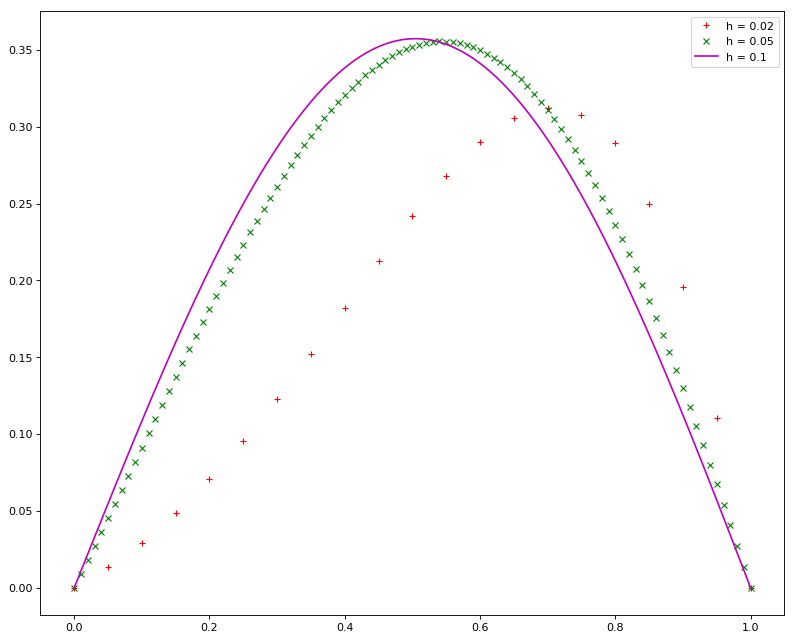

In [124]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'r+', label = 'h = 0.02')
plt.plot(x_2, (a_2),  'gx', label = 'h = 0.05')
plt.plot(x_3, (a_3),  'm-', label = 'h = 0.1')
# plt.plot(x_4, (a_4), 'bx', label = 'h = 0.25')
plt.legend(loc='best')
plt.show()

In [125]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Question 2

ef

In [127]:
x1 = 0
x2 = 1

In [128]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]


def main_(dx=None):
    dt = 1/96
    r = dt/(dx*dx)
    n = int((x2-x1)/dx)
    
    x_f = np.zeros(n+1)    
    u_j_n = np.zeros(n+1)
    
    for i in range(n+1):
        x_f[i] = i*dx
        u_j_n[i] = np.sin(np.pi*x_f[i])
    
    u_j_n[0]=u_j_n[-1]=0
    print("Value of r = ", r)

    flag=10
    while flag!=0:
    
        a = np.zeros(n-1)
        b = np.zeros(n-1)
        c = np.zeros(n-1)
        d = np.zeros(n-1)
        
        #print(u_j_n)
        #print(-1 * u_j_n[1] - (r/2)*(u_j_n[2]-2*u_j_n[1]+u_j_n[0]))

        for i in range(n-1):
            a[i] = r/2
            b[i] = -1 * r
            c[i] = r/2-1
            d[i] = -1 * u_j_n[i+1] - (r/2)*(u_j_n[i+2] - 2*u_j_n[i+1] + u_j_n[i])
            
        #print(d)
            
        a[0] = 0
        c[-1] = 0

        c_, d_ = thomas_(a,b,c,d)
        res1 = np.zeros(n-1)

        res1[-1] = d_[-1]
        for i in range(n-2):
            res1[n-3-i] = d_[n-3-i] - res1[n-2-i]*c_[n-3-i]

        res = np.zeros(n+1)
        for i in range(n-1):
            res[i+1] = res1[i]
            
        flag = flag-1
        
        u_j_n = res
        
    return [u_j_n, x_f]

In [ ]:
a_1, x_1 = main_(0.05)
a_2, x_2 = main_(0.01)
a_3, x_3 = main_(0.001)
# a_4, x_4 = main_(0.1)

In [ ]:
print(pd.DataFrame(np.column_stack((x_1, a_1)), columns=["x", "u(x,t)"]))
print()
print(pd.DataFrame(np.column_stack((x_2, a_2)), columns=["x", "u(x,t)"]))
print()
print(pd.DataFrame(np.column_stack((x_3, a_3)), columns=["x", "u(x,t)"]))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'r+', label = 'h = 0.02')
plt.plot(x_2, (a_2),  'gx', label = 'h = 0.05')
plt.plot(x_3, (a_3),  'm-', label = 'h = 0.1')
# plt.plot(x_4, (a_4), 'bx', label = 'h = 0.25')
plt.legend(loc='best')
plt.show()